In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


#  Linear Regression   

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np
import os

# List the files in the current directory to confirm
print(os.listdir('/kaggle/input'))


data = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')


df = pd.DataFrame(data)
print(df.head())

df.shape

['boston-housing-dataset']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
# preprocessing to replace  rows with na with the mean value 
missing_values = df.isna().sum()
print(missing_values)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [10]:
# column with na
na_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


# fill na with the mean balue of that column
df[na_columns] = df[na_columns].fillna(df[na_columns].mean())
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [11]:
#splitting the data into training and testing sets
from sklearn.model_selection import  train_test_split

x = df.drop(["MEDV"], axis=1) #all attributes except the dependent
y = df["MEDV"] #dependent attribute

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train
y_train



220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.37822248, -0.49984119, -0.71038894, ..., -0.48463784,
         0.3716906 , -0.43085557],
       [-0.4028516 , -0.49984119, -0.03317071, ...,  0.33649132,
         0.20501196, -0.40701928],
       [-0.40846985,  0.79534138, -0.89695448, ..., -0.84958414,
         0.36660893, -0.19669908],
       ...,
       [-0.40381289, -0.49984119, -0.15069232, ..., -0.30216469,
         0.40342278, -0.34812962],
       [-0.39413942, -0.49984119,  0.00707922, ..., -0.25654641,
         0.38343489,  0.84368481],
       [-0.40527584, -0.49984119, -1.02622824, ..., -0.84958414,
         0.43041207,  0.26740748]])

In [14]:
# scaler.inverse_transform(X_train)

In [15]:
from sklearn.linear_model import LinearRegression

# cross validation
from sklearn.model_selection import cross_val_score

regression = LinearRegression()
regression.fit(X_train,y_train)

# cross_val_score for cross validation i.e breaking into 5 small models, calculating their mse and taking mean of them together
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv = 5)

mse




array([-17.33011006, -20.23643278, -23.35699046, -32.36220819,
       -16.91828818])

In [16]:
np.mean(mse)

-22.040805933063297

In [17]:
reg_pred = regression.predict(X_test)

reg_pred

array([26.175296  , 22.64747588, 29.1456294 , 11.52971235, 21.65312134,
       19.42320699, 20.18413017, 21.46914355, 19.1985363 , 19.98228162,
        4.32483046, 16.16891668, 16.87682404,  5.31232373, 39.36827861,
       33.09358732, 21.9152876 , 36.61918436, 31.52676377, 23.52713482,
       24.96022461, 23.69866912, 20.88033802, 30.55074901, 22.74081741,
        8.66805959, 17.65119072, 17.93088633, 36.01223185, 21.16299556,
       17.83464361, 17.43306603, 19.5240167 , 23.50605522, 28.97262793,
       19.21808862, 11.23997435, 23.94256597, 17.86786717, 15.40849806,
       26.3630836 , 21.5193299 , 23.78733694, 14.84041522, 23.9445175 ,
       24.97067627, 20.11366175, 23.08636158, 10.42208266, 24.52832122,
       21.60847326, 18.66228165, 24.53362832, 31.03502944, 12.97457826,
       22.38536236, 21.34822822, 16.10928673, 12.37477824, 22.78596712,
       18.28714824, 21.91802045, 32.49771603, 31.21256855, 17.47867791,
       33.18861907, 19.17896285, 19.94662594, 20.17142015, 23.90

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


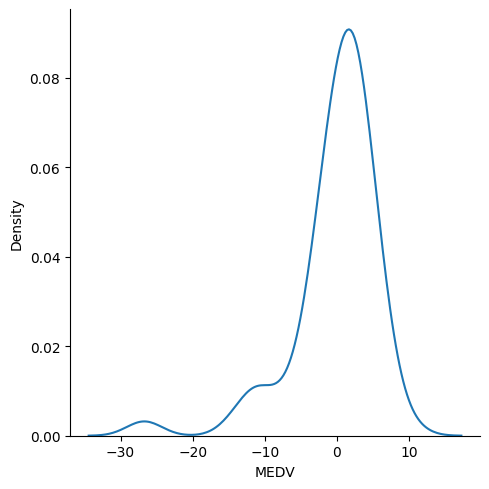

In [18]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

In [19]:
from sklearn.metrics import r2_score

score = r2_score(reg_pred,y_test)

score

0.34054297121375643

# Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [22]:
print(ridgecv.best_params_)

{'alpha': 10}


In [23]:
print(ridgecv.best_score_)

-21.899971522216525


In [27]:
best_model = ridgecv.best_estimator_
predictions = best_model.predict(X_test)

print(predictions)


[26.50331959 22.25405526 29.05798624 11.53526112 21.76735331 19.6317505
 19.92521996 21.47308673 19.043206   20.06988832  4.81967777 15.95188194
 16.90245655  5.34245884 39.30825073 33.16949857 21.60488057 36.66366252
 31.3137989  23.43022589 24.96181112 23.59956096 20.87763529 30.18596908
 22.65823612  8.31167856 17.85282758 18.32257556 35.95140629 21.23134566
 17.63135646 17.44864205 19.82433679 23.49039289 28.63206344 19.30671333
 11.32683167 23.6912276  17.5503918  15.17300518 26.22699504 21.47822204
 24.17823146 14.55771358 24.69115165 25.00662785 20.18631479 23.59712759
 10.85694142 24.60207673 22.1529791  18.79078947 24.29333343 31.48150103
 13.25293538 22.48691809 21.58338503 16.76763942 12.33266533 22.77730059
 19.0846154  22.00581442 32.35155629 30.9062307  17.26247364 33.02790653
 19.18752297 20.24888641 19.83622826 23.73285004 22.79376799 24.19170517
 30.69773261 28.98410929 24.81878185  5.62140659 36.81470161 24.115046
 27.59002612 19.75933881 28.65633352 19.03189453 17.34

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


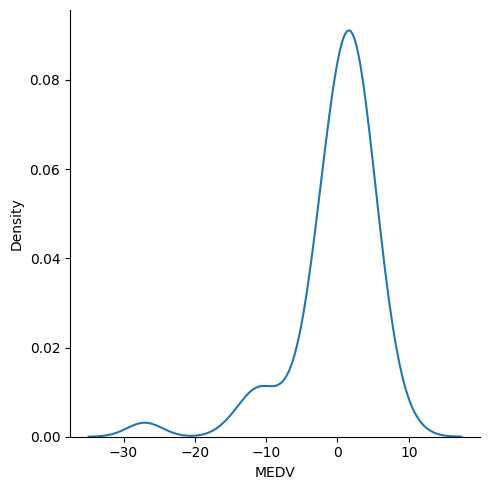

In [29]:
import seaborn as sns
sns.displot(predictions-y_test, kind='kde')

# Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor

Lasso()

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

lassocv = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [34]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 10}
-21.899971522216525


In [35]:
best_model = lassocv.best_estimator_
predictions = best_model.predict(X_test)

print(predictions)

[26.39887883 21.7341307  25.90453403 13.60957274 22.4164625  20.94198132
 19.69533703 21.93343722 17.62549201 21.72951613 14.77109793 17.77939975
 18.49479061  7.01864328 36.50581824 32.21067567 21.36440818 35.30453899
 28.70350666 22.36617685 25.03579933 24.23904239 19.50151098 26.92290841
 22.18132099 10.27625666 19.06133997 21.7571636  34.2343567  20.38318185
 17.81759767 18.94144674 23.18975849 23.70632264 26.52975478 17.81706715
 13.02580729 20.64440254 18.2914665  14.93426535 26.07338189 20.83392656
 24.85146509 14.71811158 27.47090304 25.67474345 21.47727163 23.82174533
 12.6732128  23.99903752 23.62555026 17.44373519 22.9379218  34.3009965
 16.05108389 22.50871209 21.91762735 20.92586159 18.82630671 19.47686906
 23.35780089 22.22089543 30.97954136 28.73013821 17.39575576 29.96223035
 19.83393513 22.34021065 19.47893478 22.07004338 22.75223822 24.1490787
 28.29008585 29.37757336 24.73312099  6.76334209 35.4437529  23.76067764
 25.73830381 19.50974127 28.01178169 20.23758011 17.8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


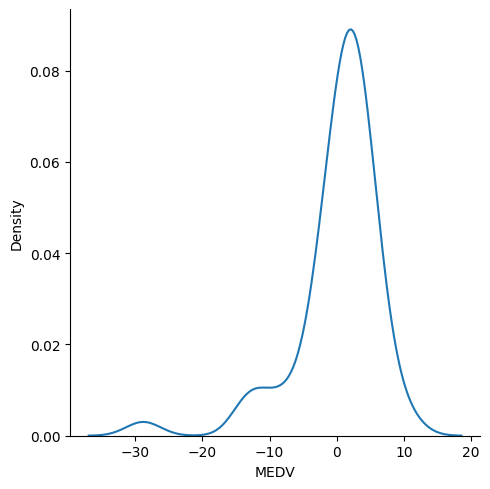

In [36]:
import seaborn as sns
sns.displot(predictions-y_test, kind='kde')